In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df_students=pd.read_parquet('students.parquet', engine='pyarrow', dtype_backend='pyarrow')
df_students.rename(columns={'race/ethnicity':'race'},inplace=True)
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [94]:
df_students.race.value_counts()


race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64[pyarrow]

In [95]:
df_students['parental level of education'].value_counts()


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64[pyarrow]

In [96]:
df_students['lunch'].value_counts()


lunch
standard        645
free/reduced    355
Name: count, dtype: int64[pyarrow]

In [97]:
df_students['test preparation course'].value_counts()


test preparation course
none         642
completed    358
Name: count, dtype: int64[pyarrow]

In [98]:
df_students['total']=df_students['math score']+df_students['writing score']+df_students['reading score']
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


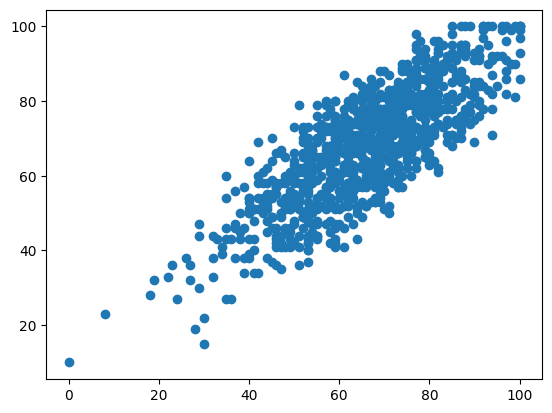

In [99]:
plt.scatter(df_students['math score'], df_students['writing score'])

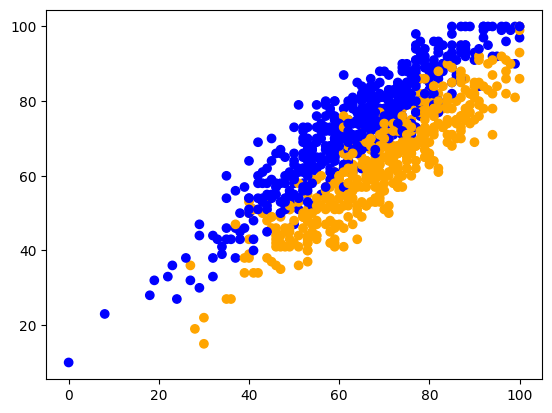

In [100]:
#plt.scatter(x='math score', y='writing score', data=df_students, hue='gender')
plt.scatter(df_students['math score'], df_students['writing score'], c=df_students['gender'].map({'male':'orange','female':'blue'}))

In [101]:
df_students.describe()

,math score,reading score,writing score,total
count,1000.0,1000.0,1000.0,1000.0
mean,66.089,69.169,68.054,203.312
std,15.16308,14.600192,15.195657,42.771978
min,0.0,17.0,10.0,27.0
25%,57.0,59.0,57.75,175.0
50%,66.0,70.0,69.0,205.0
75%,77.0,79.0,79.0,233.0
max,100.0,100.0,100.0,300.0


In [102]:
df_student_stats=pd.DataFrame(df_students.describe())
df_student_stats=df_student_stats.loc[['std','mean','50%','75%']]
df_student_stats


,math score,reading score,writing score,total
std,15.16308,14.600192,15.195657,42.771978
mean,66.089,69.169,68.054,203.312
50%,66.0,70.0,69.0,205.0
75%,77.0,79.0,79.0,233.0


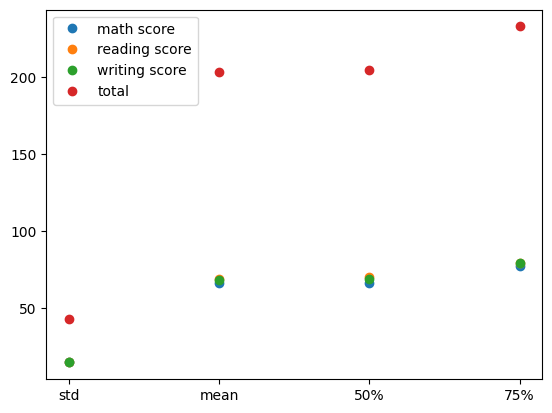

In [103]:
plt.plot(df_student_stats, linestyle='',marker='o')
plt.legend(df_student_stats.columns)


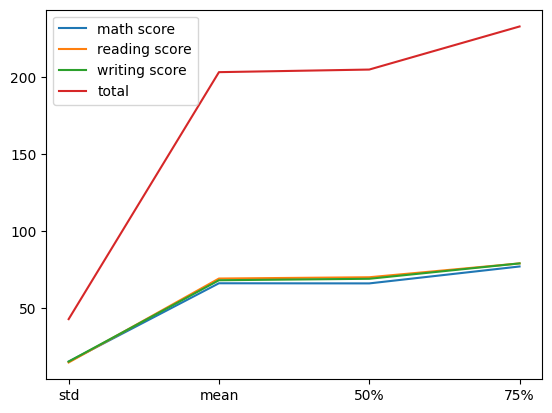

In [104]:
plt.plot(df_student_stats)
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

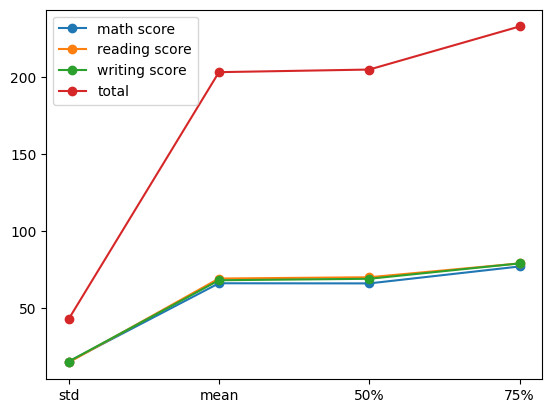

In [105]:
plt.plot(df_student_stats,  marker="o")
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

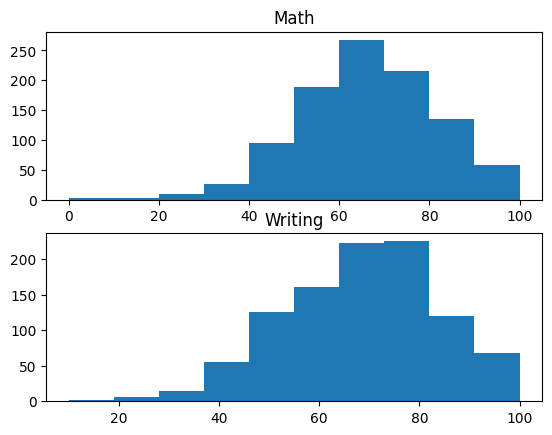

In [106]:
figure, axis = plt.subplots(2)
df_students_male=df_students[df_students['gender']=='male']
df_students_female=df_students[df_students['gender']=='female']

# For Sine Function
axis[0].hist( df_students['math score'])

axis[0].set_title("Math")
  
# For Cosine Function
axis[1].hist(df_students['writing score'])
axis[1].set_title("Writing")
  
# axis[2].hist(df_students['reading score'])
# axis[2].set_title("Reading")
# For Tangent Function
# axis[1, 0].plot(X, Y3)
# axis[1, 0].set_title("Tangent Function")
  
# # For Tanh Function
# axis[1, 1].plot(X, Y4)
# axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()

(array([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

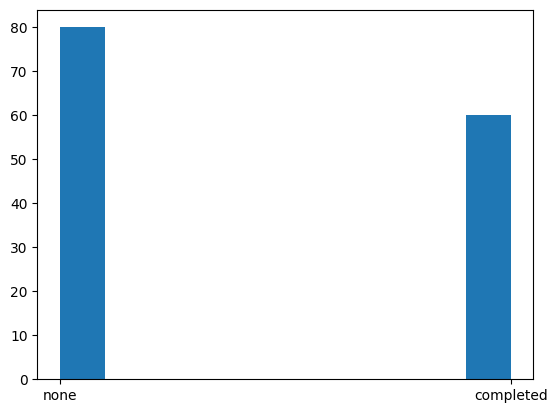

In [107]:
plt.hist(df_students[df_students['race']=='group E']['test preparation course'])

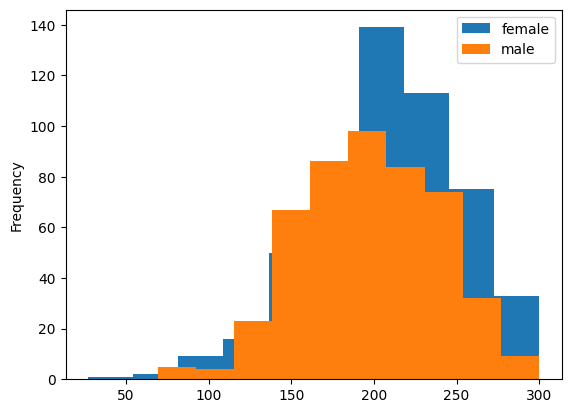

In [112]:
df_students.groupby('gender')['total'].plot(kind='hist')
plt.legend()
#df_students_male['total'].plot(kind='kde')
